<a href="https://colab.research.google.com/github/SriramyaK/Deep-Learning/blob/master/Food_101_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
dest = Path(base_dir + "data/food-101/")


In [0]:
path = untar_data(URLs.FOOD, dest=dest); path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101')

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/train.json'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/test.json'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images')]

In [0]:
path_img = path/'images'
path_img

PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images')

In [0]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c:Union[pathlib.Path, str], check_ext:bool=True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [0]:
fnames = get_image_files(path_img,recurse=True)
fnames[:5]

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images/ramen/591519.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images/ramen/1397194.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images/ramen/3468139.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images/ramen/3317934.jpg'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images/ramen/345186.jpg')]

In [0]:
np.random.seed(2)
pat= re.compile(r'[/\\]([^/\\]+)\d+.jpg$')

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:525: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
379961, 224875, 291606, 42454, 47904...
  if getattr(ds, 'warn', False): warn(ds.warn)


ImageDataBunch;

Train: LabelList (44416 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
139719,331793,34518,42844,175353
Path: /content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images;

Valid: LabelList (1202 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
73377,195992,332673,367626,62807
Path: /content/gdrive/My Drive/fastai-v3/data/food-101/food-101/images;

Test: None

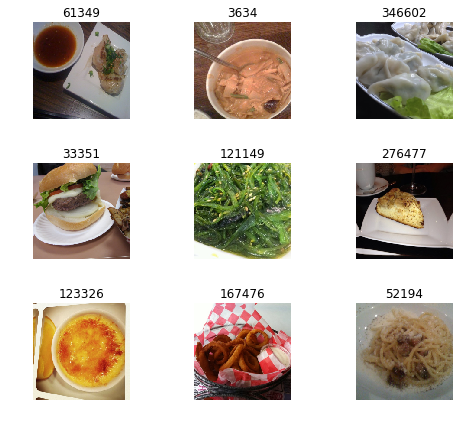

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes), data.c

['100020', '100028', '100043', '10005', '100071', '100073', '100078', '10009', '100108', '100111', '100119', '10013', '100136', '100144', '100152', '10022', '100222', '100223', '100230', '100233', '10025', '100255', '10026', '10027', '100272', '100280', '100284', '100305', '100318', '100320', '100328', '100333', '100337', '10034', '100340', '10035', '100350', '100353', '10037', '100380', '100391', '100399', '100405', '10041', '100423', '100427', '100435', '100437', '100441', '100446', '100449', '100454', '100456', '100474', '100477', '100480', '100486', '100490', '100493', '100494', '1005', '10050', '100503', '100506', '10051', '100529', '100545', '100548', '100564', '100565', '100568', '100574', '100575', '100603', '100605', '100627', '100632', '100648', '100653', '100670', '100671', '100697', '100698', '100708', '100710', '100716', '100725', '100727', '10075', '100751', '100786', '100795', '100797', '100816', '100818', '100822', '100833', '100834', '10085', '100850', '100854', '10085

(41959, 41959)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


OSError: ignored

In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.load('stage-1')

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))